# Introduction to Social Network Analysis with Python
## Russell J. Funk

This tutorial will walk you through the basics of social network analysis with Python. Although our focus will be on social networks, the tools and techniques we'll use can be used for all sorts of relational data, from citations among documents and co-occurring words to drug-drug interactions. Here's a quick road map with some of the things we'll discuss.

## Agenda
* Why Python?
* Package landscape
* "Hello, World!"
* Plotting
* Relational data
  * Edge lists
  * Adjacency matrices
  * Affiliation matrices
* Generating graphs
* On to real data!
* Characterizing vertices
* Characterizing networks
* Next steps

## Why Python?

People have been using computers to study social networks for a long time, and so there are a lot of different software options available. If you're just getting started with social network analysis (or even if you've been studying networks for a long time), there are a few reasons why I strongly recommend you consider using Python (or adding Python to your toolbox).

* __Community.__ Python is one of the most popular programming languages. That means there's a big community of developers who are regularly creating both general purpose and highly specialized packages for network analysis. In addition, there are many people who can help you when you have questions (e.g., via [Stack Overflow](https://stackoverflow.com)).
* __Flexibility.__ Because Python is a general-purpose programming language, it's easy to write programs that implement measures or conduct analyses that are not implemented in existing libraries. In addition, as you learn how to do network analysis in Python, you'll also be learning about Python more generally, meaning you'll be able to use the language for all sorts of things beyond social network analysis. 

## Package landscape

Among general purpose network analysis packages, the two most popular are `igraph` and `networkx`, but there are others as well. For this tutorial, we'll be using `networkx`.

#### [igraph](https://igraph.org/)
* Pros
  * Ultra fast; implemented in C
  * Has companion libraries in R and C
  * Great suite of community detection algorithms
* Cons
  * Can be difficult to install
  * Development has stalled (last major release was in 2015)

#### [networkx](https://networkx.github.io/)
* Pros
  * Large suit of network measures
  * Integrates easily with `matplotlib`
  * Development is active
* Cons
  * Slower; implemented in pure Python

### Outside Python
Notwithstanding its strengths, Python is not the only game in town. If Python is not your go-to tool and you're not interested in learning a new programming language, here are some other resources you may want to consider.

#### [R](https://www.r-project.org/)
* [statnet](http://www.statnet.org/)
  * Tools for the statistical analysis of networks (e.g., ERGMs) 
* [RSiena](https://www.stats.ox.ac.uk/~snijders/siena/)
  * Also focuses on the statistical analysis of networks.
* igraph
  * The same igraph you know and love from Python, but in R.

#### [Pajek](http://mrvar.fdv.uni-lj.si/pajek/)
* Slovenian for "spider," Pajek is a popular, GUI based network analysis program for Windows. Primarily used for visualization. 

#### [UCINET](https://sites.google.com/site/ucinetsoftware/home)
* Like Pajek, UCINET is a popular, GUI based network analysis program for Windows, though with less emphasis on visualization and more focus on quantitative analysis. 

#### [Gephi](https://gephi.org/)
* Gephi is a popular, GUI based program for large scale network visualization.

#### [Cytoscape](https://cytoscape.org/)
* Similar to Gephi, Cytoscape is a popular GUI based program for large scale network visualization. In addition, there is a package available that allows you to use Cytoscape from within Python scripts.


## "Hello, World!"

OK, enough throat clearing. Let's start doing some network analysis. We'll start by loading some packages.

In [2]:
# load networkx
from networkx import nx

# load matplotlib (for plotting)
import matplotlib.pyplot as plt

Next, we'll build a simple network.

In [26]:
# initialize the network
G = nx.Graph()

# add some nodes
G.add_node("Romeo")
G.add_node("Tybalt")
G.add_node("Juliet")
G.add_node("Mercutio")
G.add_node("Friar Lawrence")

# add some edges
G.add_edge("Romeo", "Tybalt")
G.add_edge("Romeo", "Juliet")
G.add_edge("Romeo", "Mercutio")
G.add_edge("Tybalt", "Mercutio")
G.add_edge("Juliet", "Friar Lawrence")

# check out some of the graph properties
print(G.nodes)
print(G.edges)
print(G.adj)
print(G.degree)

['Romeo', 'Tybalt', 'Juliet', 'Mercutio', 'Friar Lawrence']
[('Romeo', 'Tybalt'), ('Romeo', 'Juliet'), ('Romeo', 'Mercutio'), ('Tybalt', 'Mercutio'), ('Juliet', 'Friar Lawrence')]
{'Romeo': {'Tybalt': {}, 'Juliet': {}, 'Mercutio': {}}, 'Tybalt': {'Romeo': {}, 'Mercutio': {}}, 'Juliet': {'Romeo': {}, 'Friar Lawrence': {}}, 'Mercutio': {'Romeo': {}, 'Tybalt': {}}, 'Friar Lawrence': {'Juliet': {}}}
[('Romeo', 3), ('Tybalt', 2), ('Juliet', 2), ('Mercutio', 2), ('Friar Lawrence', 1)]


In [27]:
# we'll typically want to build the network using a more efficient approach

# initialize the network (again)
G = nx.Graph()

# create a list of nodes and add them to the graph
node_list = ["Romeo", "Tybalt", "Juliet", "Mercutio", "Friar Lawrence"]
G.add_nodes_from(node_list)
    
# create a list of edges and add them to the graph
edge_list = [("Romeo", "Tybalt"), ("Romeo", "Juliet"), ("Romeo", "Mercutio"), ("Tybalt", "Mercutio"), ("Juliet", "Friar Lawrence")]
G.add_edges_from(edge_list)

## Plotting

So you've now made your first network in `networkx`. Yay! In addition, you've already started looking at some of the basic properties of the network, like lists of nodes and edges. That's great, but if you're like me, to really understand what's going on in a network, you need some kind of visualization. Turns out plotting is really easy with `networkx`.

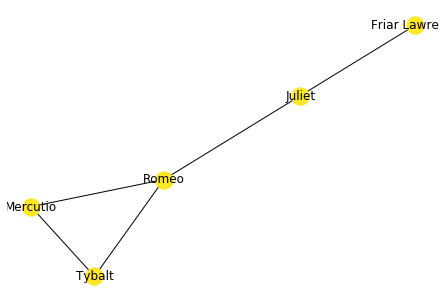

In [29]:
%matplotlib inline

# plot our network
nx.draw(G, with_labels=True, node_color='#fde725')
plt.show()

We did it! It's not terribly pretty, but it's ours. We'll learn more about how to clean up our plots a bit later.

## Relational data

### The basics

Before we get too far ahead of ourselves, we need to talk a little bit about network data. Typically, you'll see network data represented in one of three formats.

* __Adjacency matrices__ represent relational data as an $n\times n$ matrix, where $n$ is the number of nodes in the network. Each node appears once as a row and once as a column. Cell entries correspond to 0 or 1, indicating whether there is or is not a relationship between node $i$ and node $j$. In the adjacenty matrix below, we see a random selection of characters selected from Romeo and Juliet, with connections appearing if the two characters appears in the same set of (randomly selected) scenes together (listed below).

|                | Romeo | Tybalt | Juliet | Mercutio | Friar Lawrence |
|----------------|-------|--------|--------|----------|----------------|
| Romeo          | 0     | 1      | 1      | 1        | 0              |
| Tybalt         | 1     | 0      | 0      | 1        | 0              |
| Juliet         | 1     | 0      | 0      | 0        | 1              |
| Mercutio       | 1     | 1      | 0      | 0        | 0              |
| Friar Lawrence | 0     | 0      | 1      | 0        | 0              |

* __Edge lists__ essentially represent relational data in a sparse matrix format. Rather than recording all realized (i.e., 1s) and potential (i.e., 0s) relationships, we're only going to record the ones we observe. This format is really helpful for computational purposes when you have a large network.

| a      | b              |
|--------|----------------|
| Romeo  | Tybalt         |
| Romeo  | Juliet         |
| Romeo  | Mercutio       |
| Tybalt | Mercutio       |
| Juliet | Friar Lawrence |

* __Affiliation matrices__ are $n\times m$ matrices used to represent a special kind of network in which we have two kinds of nodes, what we'll call __actors__ ($n$) and __events__ ($m$), with rows indexing the former and columns indexing the latter. 

|                | A1,S1 | A2,S1  | A1,S2  | A3,S1    | A4,S1          | A5,S1 |
|----------------|-------|--------|--------|----------|----------------|-------|
| Romeo          | 1     | 1      | 1      | 1        | 0              |  1    |
| Tybalt         | 1     | 0      | 0      | 1        | 0              |  0    |
| Juliet         | 0     | 0      | 1      | 0        | 1              |  0    |
| Mercutio       | 0     | 1      | 0      | 1        | 0              |  0    |
| Friar Lawrence | 0     | 0      | 0      | 0        | 1              |  0    |

### Augmenting the basics

# FINISH (DIRECTION, VERTEX ATTRIBUTES, PROJECTION, HOW TO IN NETWORKX, WEIGHTS)


## Generating graphs

## On to real data!

http://www.patentsview.org/api/inventors/query?q={"_and":[{"_gte":{"patent_date":"2014-01-01"}},{"_lt":{"patent_date":"2014-12-31"}},{"location_city":"Minneapolis"},{"location_state":"MN"}]}&f=["patent_number","inventor_id"]&o={"per_page":10000}

## Characterizing vertices

## Characterizing networks

## Next steps